In [1]:
## file twi_neo_repeat3_iz_np1_v2.2_10yrs.db available at: https://s3df.slac.stanford.edu/groups/rubin/static/sim-data/defunct_sims_featureScheduler_runs2.2/twilight_neo/
##  DO NOT ADD TO THE REPO!!!!


In [8]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from scipy.stats import binned_statistic
import rubin_sim.maf as maf

In [9]:
csfont = {'fontname':'Times New Roman'}

In [10]:
# Let's make a plot looking at how the twilight NEO observations are distributed

bundleList = []

nside=64
metric = maf.CountMetric(col='night')
sql = 'night < 366 and visitExposureTime < 20'

slicer = maf.HealpixSlicer(
        nside=nside,
        latCol='altitude',
        lonCol='azimuth',
        useCache=False)
plotFuncs = [maf.LambertSkyMap()]
plotDict = {"norm": "log", 'title':'',
           'xlabel': 'N Observations'}

bundle = maf.MetricBundle(
            metric,
            slicer,
            sql,
            plotFuncs=plotFuncs,
            plotDict=plotDict,
        )
bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Text(-1.3, 1.4, 'Twilight NEO')

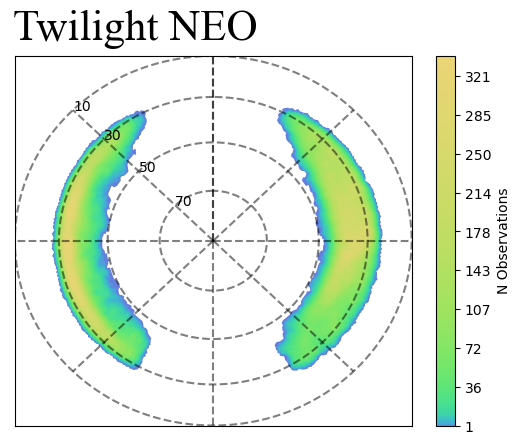

In [11]:
bg = maf.MetricBundleGroup([bundle], 'twi_neo_repeat3_iz_np1_v2.2_10yrs.db', 'temp', None)
bg.runAll()
bg.plotAll(closefigs=False)
ax = plt.gca()
title= 'Twilight NEO'
ax.text(-1.3,1.4,title,fontsize=31, **csfont)
#ah, there's no savefig here, so it changes the plot on the screen but doesn't write to disk.

In [16]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

oneweb 0.01373660824602918
slv1 0.005185290160562576
slv2 0.039243625446929165


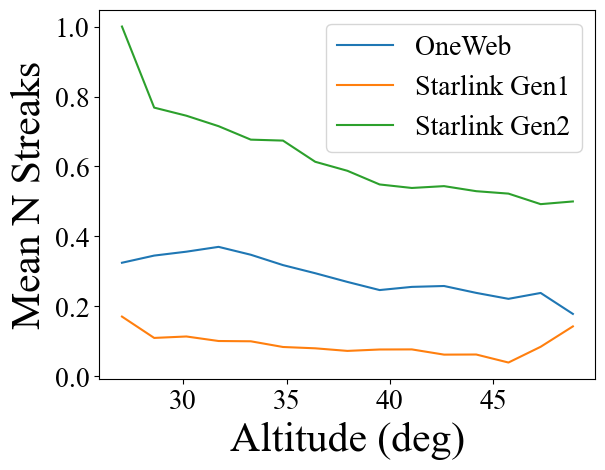

In [30]:
tags = ['oneweb', 'slv1', 'slv2']
pix_width = 50
pixscale = 0.2
n_pix = 2.9e9

labels = {'slv1': 'Starlink Gen1',
          'slv2': 'Starlink Gen2',
          'oneweb': 'OneWeb'}

con = sqlite3.connect('twi_neo_repeat3_iz_np1_v2.2_10yrs.db')

for tag in tags:
    orig = pd.read_sql('select * from observations where night < 366', con)
    data = np.load('twi_neo_repeat3_iz_np1_v2.2_10yrs%s.npz' % tag)['obs_array'].copy()
    indx = np.in1d(orig['observationId'].values, data['observationId'])
    
    orig = orig.iloc[np.where(indx == True)[0]]
    
    twi_indx = np.where(orig['visitExposureTime'] < 20)[0]
    reg_indx = np.where(orig['visitExposureTime'] >= 20)[0]

    
    pix_lost = data['streak_len_deg'][twi_indx].mean() * 3600/pixscale * pix_width  # pix per image
    pix_lost_percent = pix_lost/n_pix*100
    
    print(tag, pix_lost_percent)
    
    mean_n_s, alts, bd = binned_statistic(orig['altitude'].values[twi_indx], data['n_streaks'][twi_indx], bins=15)
    plt.plot(alts[1:], mean_n_s, label=labels[tag])

plt.legend(fontsize=20)
plt.xlabel('Altitude (deg)',fontsize=30,labelpad=5, **csfont)
plt.ylabel('Mean N Streaks',fontsize=30,labelpad=5, **csfont)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.savefig('twilight_curves.pdf',bbox_inches='tight')
con.close()

In [7]:
# sanity check, one 3.5 degree streak wipes out what % of pixels?
3.5*3600/.2*50/2.9e9*100

0.10862068965517241

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


TypeError: _save_dispatcher() got an unexpected keyword argument 'bbox_inches'

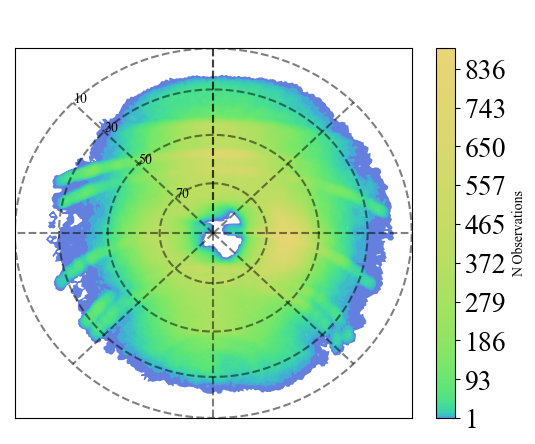

In [31]:
# And again with the regular observations

# Let's make a plot looking at how the twilight NEO observations are distributed

bundleList = []

nside=64
metric = maf.CountMetric(col='night')
sql = 'night < 366 and visitExposureTime > 20'

slicer = maf.HealpixSlicer(
        nside=nside,
        latCol='altitude',
        lonCol='azimuth',
        useCache=False)
plotFuncs = [maf.LambertSkyMap()]
plotDict = {"norm": "log", 'title':'',
           'xlabel': 'N Observations'}

bundle = maf.MetricBundle(
            metric,
            slicer,
            sql,
            plotFuncs=plotFuncs,
            plotDict=plotDict,
        )
bundleList.append(bundle)
bg = maf.MetricBundleGroup([bundle], 'twi_neo_repeat3_iz_np1_v2.2_10yrs.db', 'temp', None)
bg.runAll()
bg.plotAll(closefigs=False)
# ax = plt.gca()
# title= 'Regular Observations'
# ax.text(-1.3,1.4,title,fontsize=31, **csfont)
plt.save('opsim_Count_night_night_lt_366_and_visitExposureTime_gt_20_HEAL_SkyMap.pdf',bbox_inches='tight')


oneweb 0.00906183263869551
slv1 0.0019256437922667215
slv2 0.01029642947897491


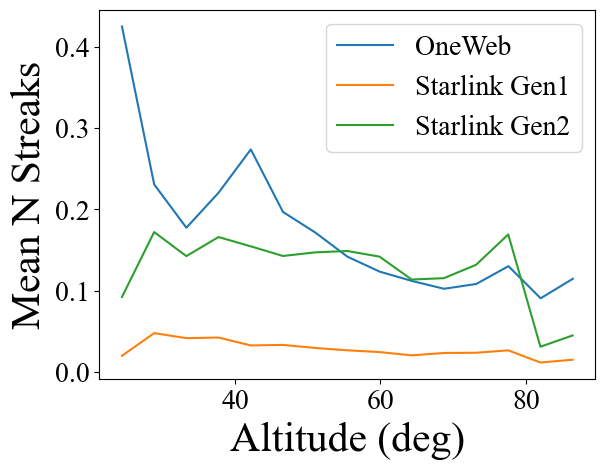

In [29]:
tags = ['oneweb', 'slv1', 'slv2']
pix_width = 50
pixscale = 0.2
n_pix = 2.9e9

labels = {'slv1': 'Starlink Gen1',
          'slv2': 'Starlink Gen2',
          'oneweb': 'OneWeb'}

con = sqlite3.connect('twi_neo_repeat3_iz_np1_v2.2_10yrs.db')

for tag in tags:
    orig = pd.read_sql('select * from observations where night < 366', con)
    data = np.load('twi_neo_repeat3_iz_np1_v2.2_10yrs%s.npz' % tag)['obs_array'].copy()
    indx = np.in1d(orig['observationId'].values, data['observationId'])
    
    orig = orig.iloc[np.where(indx == True)[0]]
    
    twi_indx = np.where(orig['visitExposureTime'] < 20)[0]
    reg_indx = np.where(orig['visitExposureTime'] >= 20)[0]

    
    pix_lost = data['streak_len_deg'][reg_indx].mean() * 3600/pixscale * pix_width  # pix per image
    pix_lost_percent = pix_lost/n_pix*100
    
    print(tag, pix_lost_percent)
    
    mean_n_s, alts, bd = binned_statistic(orig['altitude'].values[reg_indx], data['n_streaks'][reg_indx], bins=15)
    plt.plot(alts[1:], mean_n_s, label=labels[tag])

plt.legend(fontsize=20)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.xlabel('Altitude (deg)',fontsize=30,labelpad=5, **csfont)
plt.ylabel('Mean N Streaks',fontsize=30,labelpad=5, **csfont)
# plt.title('Regular 30s Observations',fontsize=31, **csfont)
plt.savefig('regular_curves.pdf',bbox_inches='tight')
con.close()